# Pokemon Dataset using Pandas

In [1]:
import pandas as pd
import re

First, load in the data and store it as a DataFrame.
Printing the first 5 rows using the .head() method gives an overview of the structure of the data.

In [2]:
df = pd.read_csv('pokemon_data.csv')
df = pd.DataFrame(df)
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


This data appears to have a missing column, relative to most useful pokemon databases.

By adding the 'Total' column, the stat totals for each pokemon can be compared.

In [3]:
df.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2', 'Sp. Atk': 'Sp_Atk', 'Sp. Def': 'Sp_Def'}, inplace=True)
df['Total'] = df.HP + df.Attack + df.Defense + df.Sp_Atk + df.Sp_Def + df.Speed
df.reset_index(inplace=True, drop=True)
df.head()

,#,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


The total column normally appears before the pokemons base stats, so we will move it to the left of HP by getting our columns as a list, and indexing them in the order we want. Alternatively we could type out all our columns in the order we want, but this method is much more efficient, especially as the number of columns increases.

In [4]:
columns = list(df.columns.values)
df = df[columns[:4] + [columns[-1]] + columns[4:-1]]
df.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Next, we only want the entries for non-Mega and non-Primal Pokemon.

To do this, we will first check all the entries in the DataFrame which contain the word 'Mega'. It is important to note that there may be Pokemon for whom the string 'mega' is present within their name (hint: there are!).

In [5]:
df[df['Name'].str.contains('mega') | df['Name'].str.contains('Mega')]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In order to filter out the actual Mega and Primal pokemon, we will create a Boolean mask which is true for all entries containing the words 'Mega' or 'Primal'. However, we also have to consider pokemon with the string 'mega' contained within the name.

From a quick glance at the above output, it seems mega and primal pokemon have two words in their names. As such, we can add in another conditional, so that the mask returns true if 'mega' is contained within the string *and* the length of the words in the string is greater than one.

We then modify our dataframe so that it only contains rows where the value for our mask is False.

In [6]:
mask = ((df['Name'].str.contains('Primal')) | 
        ((df['Name'].str.contains('Mega')) &
         df['Name'].apply(lambda x: len(x.split()) > 1)))

df = df[~mask]
df.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


Now we will check to see if the pokemon with 'mega' in their names are still present in the DataFrame.

In [7]:
df[df['Name'].str.contains('mega') | df['Name'].str.contains('Mega')]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
168,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
520,469,Yanmega,Bug,Flying,515,86,76,86,116,56,95,4,False


They are!

We only want to work with Pokemon from generations 1 through to 4.
In order to do this, we can simply select the pokemon from our DataFrame where the Generation value is less than or equal to 4.

In [8]:
df = df[(df.Generation >= 1) & (df.Generation <= 4)]
df.reset_index(drop=True, inplace=True)
df.tail()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
500,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
501,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
502,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
503,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
504,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True


Here we can see that the last Pokemon in the DataFrame are from Generation 4.

Now the dataset has been cleaned, the Pokemon with the highest stat totals can be compared by sorting the DataFrame by the 'Total' column.

This will allow us to get an idea of who the strongest Pokemon are.

In [9]:
df_total = df.sort_values(by=['Total'], ascending=False)
df_total.reset_index(drop=True, inplace=True)
df_total.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
1,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
2,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
3,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
4,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True


We can also see who the weakest pokemon are so we know who to avoid using (sorry Caterpie!) using our new dataframe.

In [10]:
df_total.tail()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
500,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
501,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
502,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
503,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
504,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


We want to see which types are the most common - we can do this by using the aggregate function .nunique(). this returns a count of all the unique pokemon of a particular type.

In [11]:
types = df.groupby('Type_1').Name.nunique() + df.groupby('Type_2').Name.nunique()
typesdf = pd.DataFrame(types)
typesdf

,Name
Bug,47.0
Dark,23.0
Dragon,20.0
Electric,33.0
Fairy,20.0
Fighting,25.0
Fire,34.0
Flying,NaN
Ghost,19.0
Grass,57.0


Doing this gives us some kind of output, but we can see that it can't be correct because the values for normal and flying are null. Pidgey isn't *that* bad! To get around this, we are going to make two separate databases, counting type totals for type 1 and type 2, then we will merge these on type. Moreover, we will need to give the Type column a name so that we can merge the databases using it. We do this by resetting the index, which then allows us to rename the previously unnamed column.

In [12]:
# creating our two series
typeone = df.groupby('Type_1').Name.nunique()
typetwo = df.groupby('Type_2').Name.nunique()

# turning our series into dataframes
onedf = pd.DataFrame(typeone)
twodf = pd.DataFrame(typetwo)

# resetting our indices allows us to name the Type column
onedf.reset_index(inplace=True)
twodf.reset_index(inplace=True)
onedf.columns = ['Type', 'Counts']
twodf.columns = ['Type', 'Counts']

# creating the merged dataframe
type_counts = pd.merge(onedf, twodf, on='Type', how='outer')
type_counts['Counts_x'] = type_counts['Counts_x'].fillna(0)
type_counts['Counts_y'] = type_counts['Counts_y'].fillna(0)
type_counts['Counts'] = type_counts['Counts_x'] + type_counts['Counts_y']
type_counts

,Type,Counts_x,Counts_y,Counts
0,Bug,44.0,3.0,47.0
1,Dark,12.0,11.0,23.0
2,Dragon,13.0,7.0,20.0
3,Electric,31.0,2.0,33.0
4,Fairy,8.0,12.0,20.0
5,Fighting,15.0,10.0,25.0
6,Fire,31.0,3.0,34.0
7,Ghost,15.0,4.0,19.0
8,Grass,47.0,10.0,57.0
9,Ground,21.0,27.0,48.0


It's interesting to see that there are no Pokemon with a primary type of Flying, or a secondary type of Normal!
Next, we are going to drop the Counts_x and Counts_y columns as these are unnecessary.

In [13]:
type_counts.drop(['Counts_x', 'Counts_y'], axis=1, inplace=True)
type_counts

,Type,Counts
0,Bug,47.0
1,Dark,23.0
2,Dragon,20.0
3,Electric,33.0
4,Fairy,20.0
5,Fighting,25.0
6,Fire,34.0
7,Ghost,19.0
8,Grass,57.0
9,Ground,48.0


Now that we have the number of each type of Pokemon, so we want to sort this data to find the most and least common Pokemon types.

In [14]:
commontypes = type_counts.sort_values(by=['Counts'], ascending=False)
commontypes

,Type,Counts
16,Water,93.0
11,Normal,72.0
17,Flying,66.0
8,Grass,57.0
13,Psychic,56.0
12,Poison,50.0
9,Ground,48.0
0,Bug,47.0
14,Rock,37.0
6,Fire,34.0


Going back to our original database, we now want to see the average stat totals for each type, so we know which types are the best on average. As before, we will create two separate databases for Type 1 and Type 2, and then merge these.

In [15]:
totals_type1 = df.groupby('Type_1').Total.mean()
totals_type1 = pd.DataFrame(totals_type1)
totals_type1.reset_index(inplace=True)
totals_type1.columns = ['Type', 'Total']
totals_type1

,Type,Total
0,Bug,353.113636
1,Dark,440.833333
2,Dragon,486.153846
3,Electric,437.064516
4,Fairy,371.125000
5,Fighting,384.066667
6,Fire,447.354839
7,Ghost,457.400000
8,Grass,411.191489
9,Ground,417.857143


In [16]:
totals_type2 = df.groupby('Type_2').Total.mean()
totals_type2 = pd.DataFrame(totals_type2)
totals_type2.reset_index(inplace=True)
totals_type2.columns = ['Type', 'Total']
totals_type2

,Type,Total
0,Bug,393.333333
1,Dark,447.363636
2,Dragon,588.571429
3,Electric,395.000000
4,Fairy,326.583333
5,Fighting,465.200000
6,Fire,450.000000
7,Flying,433.742424
8,Ghost,384.000000
9,Grass,412.400000


In [17]:
tpt = pd.merge(totals_type1, totals_type2, on='Type', how='outer')
tpt['Total_x'] = tpt['Total_x'].fillna(0)
tpt['Total_y'] = tpt['Total_y'].fillna(0)
tpt['Total'] = ((tpt['Total_x'] + tpt['Total_y']) / 2)
tpt.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
tpt

,Type,Total
0,Bug,373.223485
1,Dark,444.098485
2,Dragon,537.362637
3,Electric,416.032258
4,Fairy,348.854167
5,Fighting,424.633333
6,Fire,448.677419
7,Ghost,420.700000
8,Grass,411.795745
9,Ground,415.058201


Again, we can sort this dataframe to see which Pokemon Types are the most powerful on average.

In [18]:
strongest_types = tpt.sort_values(by='Total', ascending=False)
strongest_types.reset_index(inplace=True, drop=True)
strongest_types

,Type,Total
0,Dragon,537.362637
1,Steel,475.732143
2,Ice,455.437500
3,Psychic,454.750988
4,Fire,448.677419
5,Dark,444.098485
6,Rock,435.546296
7,Fighting,424.633333
8,Ghost,420.700000
9,Electric,416.032258


Now we know to try and include Dragon, Steel and Ice types to strengthen our teams! With that knowledge, suppose we wanted to find pokemon which were Steel and Ice, or Dragon and Ice, or Ice and Steel, as these pokemon would logically be very strong, right? We can do this by

In [19]:
df[((df.Type_1 == 'Dragon') & (df.Type_2 == 'Ice')) | ((df.Type_1 == 'Ice') & (df.Type_2 == 'Dragon'))]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary


From the output, we can see there are no Dragon/Ice or Ice/Dragon types. We can use a for loop to see if there are any pokemon for whom both types are among the top 5 strongest.

In [20]:
combo_list = []
i = -1
types = []
for type in strongest_types.Type[:6]:
    types.append(type)
    i += 1
    for type in strongest_types.Type[:6]:
        combo_list.append(df[((df.Type_1 == type) & (df.Type_2 == types[i])) | ((df.Type_1 == types[i]) & (df.Type_2 == type))])
type_combos = pd.concat(combo_list)
type_combos.drop_duplicates(inplace=True)
type_combos.sort_values(by='Total', inplace=True, ascending=False)
type_combos.reset_index(inplace=True, drop=True)
type_combos

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
1,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
2,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
3,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
4,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
5,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
6,461,Weavile,Dark,Ice,510,70,120,65,45,85,125,4,False
7,437,Bronzong,Steel,Psychic,500,67,89,116,79,116,33,4,False
8,229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2,False
9,124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False


Now let's compare the average base stats of these Pokemon to see whether or not they have higher average base stats than the average of all pokemon in our database.

In [21]:
avg_strongtypes = type_combos.Total.mean()
avg_all = df.Total.mean()
print(f'The average of our strong-typed Pokemon is {round(avg_strongtypes, 2)}, while the overall average stats are {round(avg_all, 2)}.')
if avg_strongtypes > avg_all:
    print('the strong-typed Pokemon have a higher average base stat total than the average for all pokemon.')
elif avg_strongtypes == avg_all:
    print('the strong-typed Pokemon have the same average base stat total as the average for all pokemon.')
else:
    print('the strong-typed Pokemon have a lower average base stat total than the average for all pokemon.')

The average of our strong-typed Pokemon is 483.12, while the overall average stats are 417.01.
the strong-typed Pokemon have a higher average base stat total than the average for all pokemon.


Suppose we also want to see how the stat totals for each type change over the generations. This will be slightly more complex, but the code essentially works like so:
- For each generation, we split the overall dataframe so that our new dataframe contains all the pokemon from that generation
- Next, we create average stat total tables using the same syntax as we did for the overall dataframe, for each of our sub-dataframes.
- Once we have average stat total tables for each generation, we combine them using the concat() function. This will show us all the average stat totals for gen 1, then gen 2, and so on.

In [22]:
# generation 1
gen1 = df[df['Generation'] == 1]
ototals_type1 = gen1.groupby('Type_1').Total.mean()
ototals_type1 = pd.DataFrame(ototals_type1)
ototals_type1.reset_index(inplace=True)
ototals_type1.columns = ['Type', 'Total']
    
ototals_type2 = gen1.groupby('Type_2').Total.mean()
ototals_type2 = pd.DataFrame(ototals_type2)
ototals_type2.reset_index(inplace=True)
ototals_type2.columns = ['Type', 'Total']
            
otpt = pd.merge(ototals_type1, ototals_type2, on='Type', how='outer')
otpt['Total_x'] = otpt['Total_x'].fillna(0)
otpt['Total_y'] = otpt['Total_y'].fillna(0)
otpt['Total'] = ((otpt['Total_x'] + otpt['Total_y']) / 2)
otpt.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
otpt['Generation'] = 1

# generation 2
gen2 = df[df['Generation'] == 2]
ttotals_type1 = gen2.groupby('Type_1').Total.mean()
ttotals_type1 = pd.DataFrame(ttotals_type1)
ttotals_type1.reset_index(inplace=True)
ttotals_type1.columns = ['Type', 'Total']
    
ttotals_type2 = gen2.groupby('Type_2').Total.mean()
ttotals_type2 = pd.DataFrame(ttotals_type2)
ttotals_type2.reset_index(inplace=True)
ttotals_type2.columns = ['Type', 'Total']
            
ttpt = pd.merge(ttotals_type1, ttotals_type2, on='Type', how='outer')
ttpt['Total_x'] = ttpt['Total_x'].fillna(0)
ttpt['Total_y'] = ttpt['Total_y'].fillna(0)
ttpt['Total'] = ((ttpt['Total_x'] + ttpt['Total_y']) / 2)
ttpt.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
ttpt['Generation'] = 2

# generation 3
gen3 = df[df['Generation'] == 3]
thtotals_type1 = gen3.groupby('Type_1').Total.mean()
thtotals_type1 = pd.DataFrame(thtotals_type1)
thtotals_type1.reset_index(inplace=True)
thtotals_type1.columns = ['Type', 'Total']
    
thtotals_type2 = gen3.groupby('Type_2').Total.mean()
thtotals_type2 = pd.DataFrame(thtotals_type2)
thtotals_type2.reset_index(inplace=True)
thtotals_type2.columns = ['Type', 'Total']
            
thtpt = pd.merge(thtotals_type1, thtotals_type2, on='Type', how='outer')
thtpt['Total_x'] = thtpt['Total_x'].fillna(0)
thtpt['Total_y'] = thtpt['Total_y'].fillna(0)
thtpt['Total'] = ((thtpt['Total_x'] + thtpt['Total_y']) / 2)
thtpt.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
thtpt['Generation'] = 3

# generation 4
gen4 = df[df['Generation'] == 4]
ftotals_type1 = gen4.groupby('Type_1').Total.mean()
ftotals_type1 = pd.DataFrame(ftotals_type1)
ftotals_type1.reset_index(inplace=True)
ftotals_type1.columns = ['Type', 'Total']
    
ftotals_type2 = gen4.groupby('Type_2').Total.mean()
ftotals_type2 = pd.DataFrame(ftotals_type2)
ftotals_type2.reset_index(inplace=True)
ftotals_type2.columns = ['Type', 'Total']

ftpt = pd.merge(ftotals_type1, ftotals_type2, on='Type', how='outer')
ftpt['Total_x'] = ftpt['Total_x'].fillna(0)
ftpt['Total_y'] = ftpt['Total_y'].fillna(0)
ftpt['Total'] = ((ftpt['Total_x'] + ftpt['Total_y']) / 2)
ftpt.drop(['Total_x', 'Total_y'], axis=1, inplace=True)
ftpt['Generation'] = 4

# merging the generations into one table
atpt = pd.concat([otpt, ttpt, thtpt, ftpt], ignore_index=True)
atpt

,Type,Total,Generation
0,Bug,168.125000,1
1,Dragon,220.000000,1
2,Electric,222.222222,1
3,Fairy,395.666667,1
4,Fighting,461.071429,1
...,...,...,...
66,Psychic,446.642857,4
67,Rock,476.250000,4
68,Steel,495.666667,4
69,Water,454.384615,4


Next, we want to view the data in a more efficient manner. We can do this using a pivot table, whereby we can easily see the average stat totals for each generation grouped by type. Note there is a null value for the dark type in gen 1 - dark types were only introduced in gen 2, meaning no generation 1 pokemon are dark types, hence the null value.

In [23]:
atptpiv = atpt.pivot(columns='Generation', index='Type', values='Total').reset_index()
atptpiv

Generation,Type,1,2,3,4
0,Bug,168.125000,197.250000,371.916667,351.550000
1,Dark,NaN,519.000000,396.291667,493.291667
2,Dragon,220.000000,270.000000,478.571429,558.333333
3,Electric,222.222222,389.166667,197.500000,236.208333
4,Fairy,395.666667,308.466667,156.400000,427.500000
5,Fighting,461.071429,416.250000,407.625000,427.200000
6,Fire,227.791667,428.312500,206.666667,498.800000
7,Flying,221.815789,210.105263,216.875000,219.031250
8,Ghost,202.500000,217.500000,341.500000,495.071429
9,Grass,377.208333,488.500000,385.250000,461.357143


Finally, I want to find the strongest pokemon of my favourite type (Ghost). To do this, I will create a database of all the ghost type pokemon and sort it by base stat total.

In [24]:
ghost = df[(df['Type_1'] == 'Ghost') | (df['Type_2'] == 'Ghost')]
strong_ghosts = ghost.sort_values(by='Total', ascending=False)
strong_ghosts.reset_index(inplace=True, drop=True)
strong_ghosts

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
1,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
2,477,Dusknoir,Ghost,NaN,525,45,100,135,65,135,45,4,False
3,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False
4,426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
5,429,Mismagius,Ghost,NaN,495,60,60,60,105,105,105,4,False
6,442,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False
7,478,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
8,356,Dusclops,Ghost,NaN,455,40,70,130,60,130,25,3,False
9,354,Banette,Ghost,NaN,455,64,115,65,83,63,65,3,False


# Visualisations

Data visualisations are a great way of conveying messages about your data in a clear and concise way. I am going to use a few to generate some more insights about our dataset. First, Suppose we wanted to go back to a previous example where we compared base stats by type. We could plot that using a bar chart:

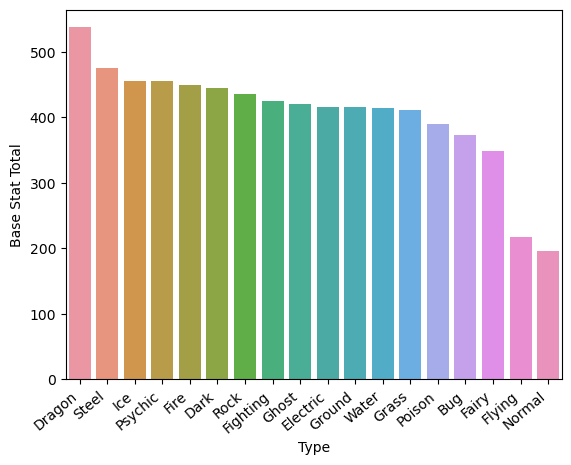

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.barplot(data=strongest_types, x='Type', y='Total')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Type')
plt.ylabel('Base Stat Total')
plt.show()
plt.clf()

Next, I am going to make a pie chart to see what types are predominant among legendary Pokemon.

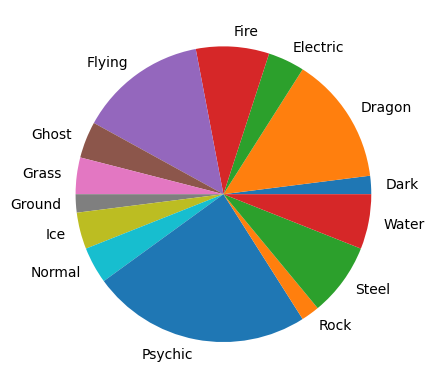

<Figure size 640x480 with 0 Axes>

In [26]:
legends = df[df.Legendary == True]
legend_counts_one = legends.Type_1.value_counts()
legend_counts_two = legends.Type_2.value_counts()
legend_counts = legend_counts_one.add(legend_counts_two, fill_value=0)

pie = legend_counts.plot.pie()
plt.ylabel('')
plt.show()
plt.clf()

In [27]:
psychic_legend = df[(df.Legendary == True) & ((df.Type_1 == 'Psychic') | (df.Type_2 == 'Psychic'))]
psychic_legend

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
248,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
379,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
380,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
384,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
385,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
386,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
387,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
388,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
489,480,Uxie,Psychic,NaN,580,75,75,130,75,130,95,4,True


Next, I am going to see whether there is a correlation between pokemon with high attack stats and high speed stats.

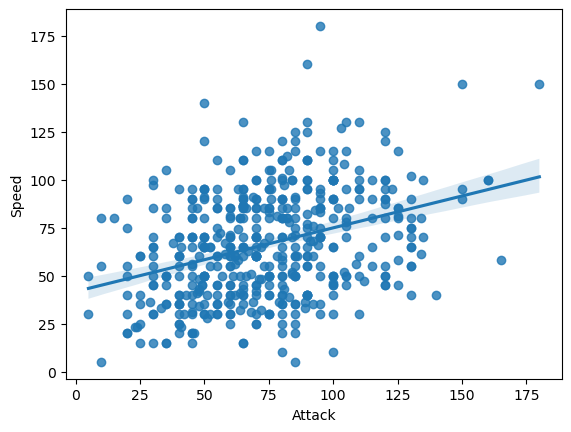

<Figure size 640x480 with 0 Axes>

In [28]:
sns.regplot(x=df.Attack, y=df.Speed)
plt.xlabel('Attack')
plt.ylabel('Speed')
plt.show()
plt.clf()

It looks like there may be a positive correlation, but it is a bit difficult to see. In order to better understand this relationship, I can calculate the correlation using the pearsonr module from the scipy library.

In [29]:
from scipy.stats import pearsonr
corr, p = pearsonr(df.Attack, df.Speed)
corr

0.3485936692070676